In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
#넘파이 데이터 세트를 판다스 dataframe으로 변환
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


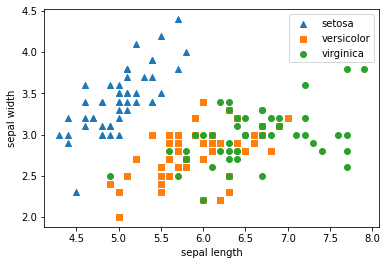

In [5]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

#setosa의 target값은 0, versicolor는 1, virginica는 2, 각 target별로 다르 모양으로 산점도로 표시
for i,marker in enumerate(markers):
    x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

#target값을 제외한 모든 속성 값을 standardscaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [10]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

#fit()와 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [11]:
#칼럼명 명명하기
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


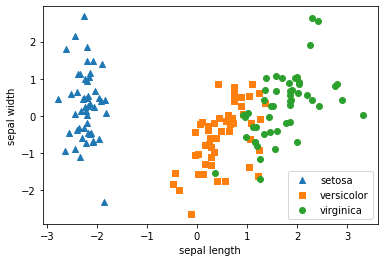

In [13]:
markers=['^','s','o']
for i,marker in enumerate(markers):
    x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [15]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring="accuracy",cv=3)
print('개별 정확도:',scores)
print('평균 정확도:',np.mean(scores))

개별 정확도: [0.98 0.94 0.96]
평균 정확도: 0.96


In [18]:
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('정확도:',scores_pca)
print('평균 정확도:',np.mean(scores_pca))

정확도: [0.88 0.88 0.88]
평균 정확도: 0.88
